In [5]:
import numpy as np
import pandas as pd
from math import pi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
width = 5
height = width*1.618
matplotlib.rcParams.update({
    'font.size': 12,
    'figure.figsize': (width, height),
    'figure.facecolor': 'white',
    'savefig.dpi': 72,
    'figure.subplot.bottom': 0.125,
    'figure.edgecolor': 'white',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

In [2]:
def range_norm(val, a=0, b=1, c=0, d=1):
    val = (val-a)*(d-c)/(b-a)+c
    return val

losses = ["balanced_cross", "balanced_focal", "balanced_hinge", "cross", "focal", "hinge"]
hp_bounds = dict(
    objective=dict(min=0, max=1),
    num_epochs=dict(min=1, max=32),
    rnn_size=dict(min=32, max=256),
    num_conv_layers=dict(min=1, max=4),
    momentum=dict(min=0.9, max=1),
    dense_size=dict(min=32, max=256),
    lr_decay=dict(min=0.9, max=1),
    rnn_layers=dict(min=1, max=4),
    dense_regularization=dict(min=0, max=1),
    num_conv_filters=dict(min=32, max=256),
    batch_size=dict(min=32, max=256),
    length=dict(min=32, max=256),
    lr=dict(min=1e-7, max=1e-2),
    regularization=dict(min=0, max=1),
    dropout_prob=dict(min=0, max=0.5),
    loss=dict(min=0, max=len(losses)-1),
)
resize_hp_list = ['objective']

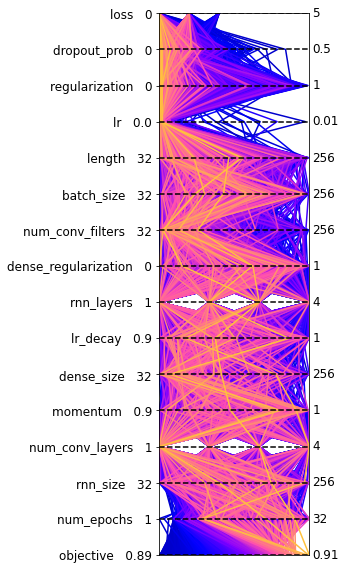

In [10]:
data = pd.read_csv("results.csv")
data = data[hp_bounds.keys()]
data = data[data['objective'] > 0.8859217675140613]
data.sort_values('objective', inplace=True)
data['loss'] = [losses.index(loss) for loss in data['loss']]
for hp in resize_hp_list:
    hp_bounds[hp]['min'] = data[hp].min()
    hp_bounds[hp]['max'] = data[hp].max()
for hp, bound in hp_bounds.items():
    a = bound['min']
    b = bound['max']
    data[hp] = range_norm(data[hp], a=a, b=b)
objective = data['objective']
objective = np.power(objective, 2)
a = objective.min()
b = objective.max()
colors = plt.cm.gnuplot2(range_norm(objective, a=a, b=b, c=0.2, d=0.8))
for i in range(len(data)):
    values = []
    for hp in hp_bounds:
        values.append(data[hp].iloc[i])
    plt.plot(values, list(range(len(hp_bounds))), color=colors[i])
for i, bound in enumerate(hp_bounds.values()):
    plt.axhline(y=i, color='black', linestyle='--')
    a = bound['min']
    b = bound['max']
    plt.text(1.02, i-0.1, round(b, 2))
plt.yticks(list(range(len(hp_bounds))), labels=[f"{key}   {round(value['min'], 2)}" for key, value in hp_bounds.items()])
plt.xticks([])
plt.ylim(0, len(hp_bounds)-1)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig("plots/hps_parallel_coordinates.png")
plt.show()

In [3]:
data = pd.read_csv("results.csv")
k = 80
data.sort_values('objective', ascending=False, inplace=True)
# top = [1, 17, 10, 78, 42, 37, 33, 29, 7, 3, 2, 26, 77, 65, 55, 51, 41, 18, 66, 52]
# data = data.iloc[top]
data = data.nlargest(k, 'objective')
# add this line to the resulting csv :
# 0,0,128,0.001,128,0.1,128,hinge,2e-05,0.97,0.9,128,3,2,0.001,2,200,0.8859217675140613,0,0
data.to_csv("ensemble.csv")

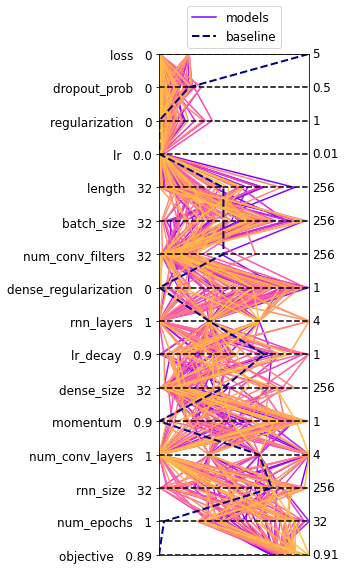

In [21]:
data = pd.read_csv("ensemble.csv")
data = data[hp_bounds.keys()]
data.sort_values('objective', inplace=True)
data['loss'] = [losses.index(loss) for loss in data['loss']]
for hp in resize_hp_list:
    hp_bounds[hp]['min'] = data[hp].min()
    hp_bounds[hp]['max'] = data[hp].max()
for hp, bound in hp_bounds.items():
    a = bound['min']
    b = bound['max']
    data[hp] = range_norm(data[hp], a=a, b=b)
colors = plt.cm.gnuplot2(np.linspace(0.4, 0.8, len(data)))
for i in range(len(data)):
    if i != 0:
        values = [data[hp].iloc[i] for hp in hp_bounds.keys()]
        plt.plot(values, list(range(len(hp_bounds))), color=colors[i], label="models" if i == 1 else None)
values = [data[hp].iloc[0] for hp in hp_bounds.keys()]
plt.plot(values, list(range(len(hp_bounds))), label="baseline", color='navy', linestyle='--', linewidth=2)
for i, bound in enumerate(hp_bounds.values()):
    plt.axhline(y=i, color='black', linestyle='--')
    a = bound['min']
    b = bound['max']
    plt.text(1.02, i-0.1, round(b, 2))
plt.yticks(list(range(len(hp_bounds))), labels=[f"{key}   {round(value['min'], 2)}" for key, value in hp_bounds.items()])
plt.xticks([])
plt.ylim(0, len(hp_bounds)-1)
plt.legend(bbox_to_anchor=[0, 1, 1, 1], loc=("lower center"))
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig("plots/config_diversity.png")
plt.savefig("plots/config_diversity.pdf")
plt.show()